<a href="https://colab.research.google.com/github/positivejmk/2021-2-practice/blob/master/week5_practice_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 앙상블 - 배깅 : 같은 모델을 여러번 사용 | 부스팅 : 여러번 사용하지만 그 분석기법을 향상시켜가면서 조금씩 수정해가며 사용
# "이런 상황에서는 반드시 어떤 모델을 써라." 라는 룰은 없는 것 같고, 계속 테스팅 하면서 가장 적합한 모델을 찾는 것. 

In [1]:
%matplotlib inline

import numpy as np
import warnings
warnings.filterwarnings("ignore", category = np.VisibleDeprecationWarning)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

#1. Loading Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigMining/WA_Fn-UseC/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [4]:
df.shape

(9134, 24)

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df['Engaged'] = df['Response'].apply(lambda x: 0. if x == 'No' else 1)

In [7]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0.0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0.0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0.0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0.0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0.0


#2. Data Analysis

In [8]:
list(df.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Engaged']

###-Engagement Rate

In [9]:
enagagement_rate_df = pd.DataFrame(
    df.groupby('Engaged').count()['Response'] / df.shape[0] * 100.0
)

In [10]:
enagagement_rate_df

,Response
Engaged,
0.0,85.679877
1.0,14.320123


In [11]:
#행과 열을 바꾸기, 행렬의 축을 바꾸는 방법(Transpose)
enagagement_rate_df.T

Engaged,0.0,1.0
Response,85.679877,14.320123


###-By Renew Offer Type

In [12]:
engagement_by_offer_type_df = pd.pivot_table(
    df, values = 'Response', index = 'Renew Offer Type', columns = 'Engaged', aggfunc = len
).fillna(0)

engagement_by_offer_type_df.columns = ['Not Engaged','Engaged']

In [13]:
engagement_by_offer_type_df

,Not Engaged,Engaged
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


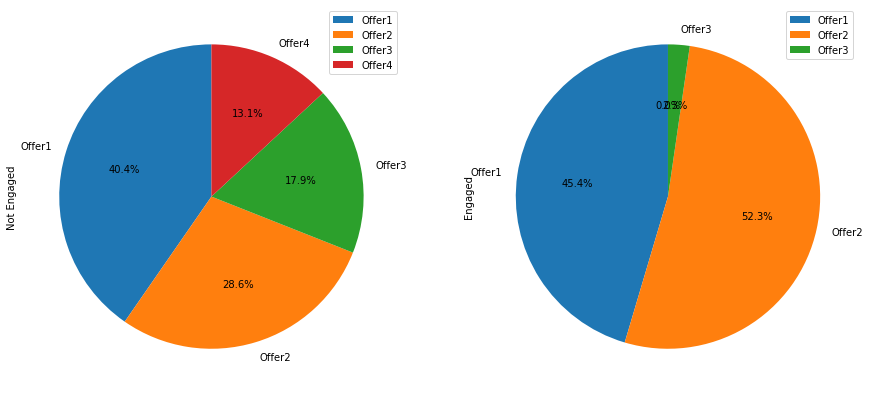

In [14]:
engagement_by_offer_type_df.plot(
    kind = 'pie',
    figsize = (15,7),
    startangle = 90,
    subplots = True,
    autopct = '%.1f%%'
)

plt.show()

### -By Sales Channel

In [15]:
engagement_by_sales_channel_df = pd.pivot_table(
    df, values = 'Response', index = 'Sales Channel', columns = 'Engaged', aggfunc = len
).fillna(0)

engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']

In [16]:
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4fb961fd0>,
      dtype=object)

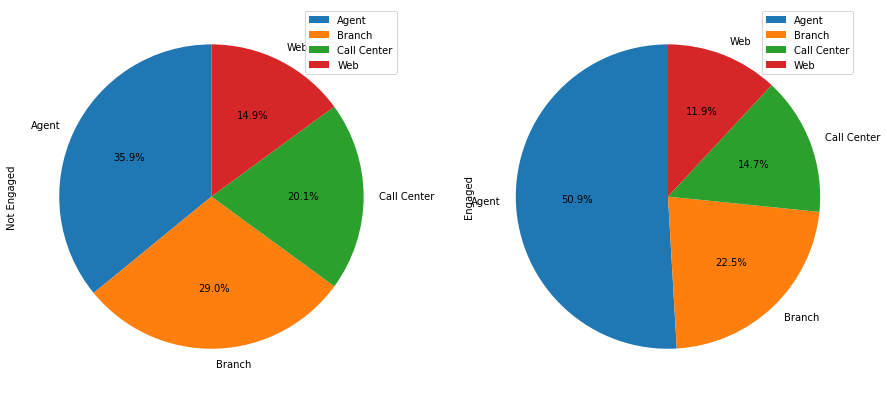

In [29]:
engagement_by_sales_channel_df.plot(
    kind = 'pie',
    figsize = (15,7),
    startangle = 90,
    subplots = True,
    autopct = '%.1f%%'
)

###-Total Claim Amount Distributions

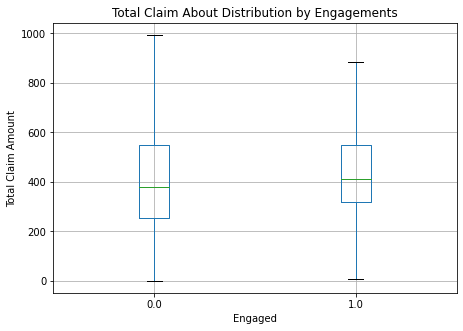

In [20]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by = 'Engaged',
    showfliers = False, #박스 범위 벗어난 이상치들 표시하지 않기
    figsize = (7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim About Distribution by Engagements')

plt.suptitle("")
plt.show()

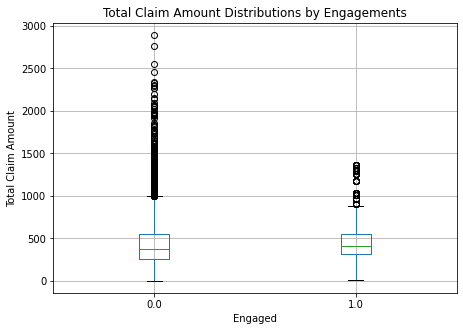

In [25]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by = 'Engaged',
    showfliers = True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')

plt.suptitle("") #자동생성된 이름 없애기
plt.show()

### -Income Distributions

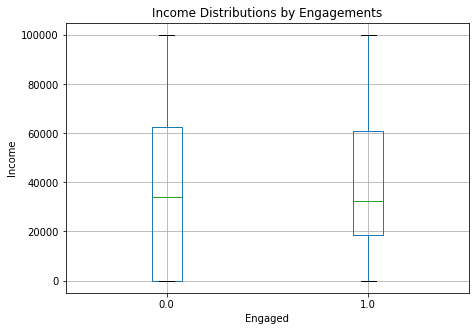

In [30]:
ax = df[['Engaged', 'Income']].boxplot(
    by = 'Engaged',
    showfliers = True,
    figsize = (7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Income')
ax.set_title('Income Distributions by Engagements')

plt.suptitle("")
plt.show()